In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

import warnings
warnings.filterwarnings('ignore')

In [31]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [32]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [33]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [34]:
#By observing the data there are no nan's present, by looking into data it looks good we can move to next step

In [35]:
data.shape

(30, 17)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


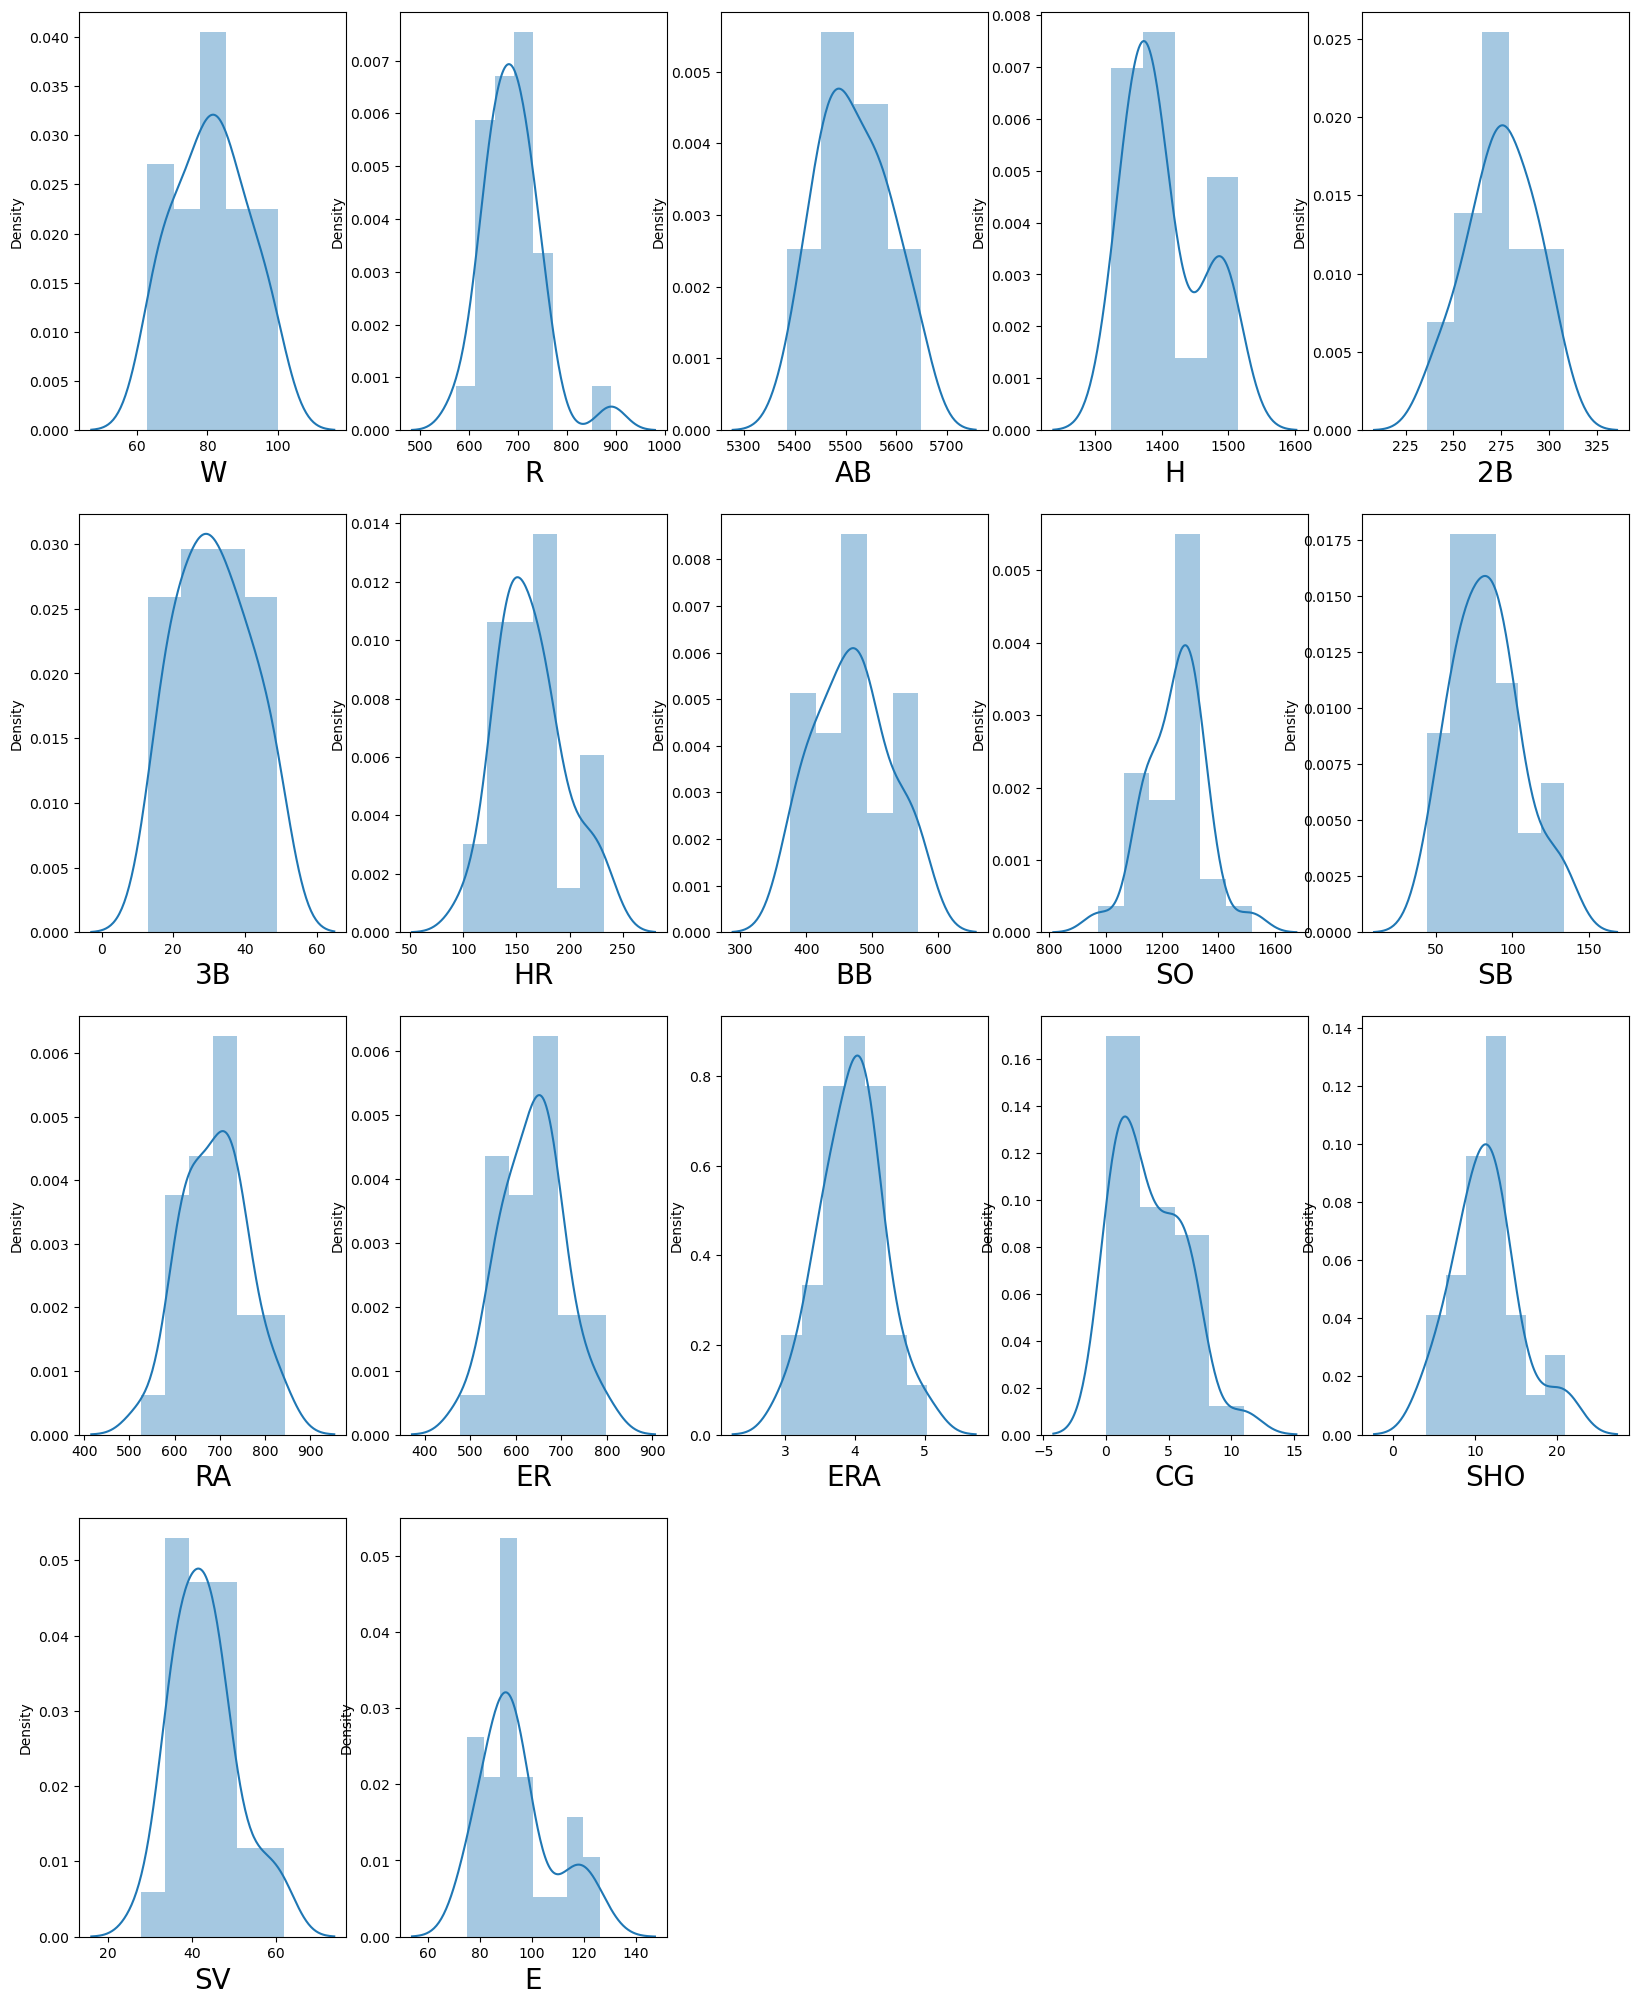

In [37]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in data:
    if plotnumber <= 17 :
        ax = plt.subplot(4,5,plotnumber)
        sn.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.show()

In [38]:
# By looking to the graphs there is no skewness in the data and spliting data into features and labels and 
# then to test and train data

In [39]:
X = data.drop(columns = ['W'])
Y = data['W']

In [83]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state = 6)

In [84]:
regression = LinearRegression()

In [85]:
regression.fit(x_train,y_train)

LinearRegression()

In [86]:
regression.score(x_test,y_test)

0.7171488150121378

In [87]:
regression.score(x_train,y_train)

0.9560336847885579

In [88]:
# evalution of the regression model

In [89]:
y_predict = regression.predict(x_test)

In [90]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [91]:
mean_absolute_error(y_test,y_predict)

4.77274137487516

In [92]:
mean_squared_error(y_test,y_predict)

32.298069685801515

In [93]:
np.sqrt(mean_squared_error(y_test,y_predict))

5.683139069722077

In [94]:
#checking wheather the model is overfitted using Lasso model

In [95]:
from sklearn.linear_model import Lasso,Ridge,RidgeCV,LassoCV

In [98]:
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [99]:
alpha = lasscv.alpha_
alpha

0.1350485186132541

In [101]:
lasso_reg  = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.1350485186132541)

In [102]:
lasso_reg.score(x_test,y_test)

0.8580334335824251

In [108]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [110]:
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [111]:
ridge_model.score(x_test,y_test)

0.6421247296143416

In [112]:
# As observed linear regression model = 71.71, Lasso model = 85.80 ,ridge model = 64.21
# lasso regression model is better when compared to linear regerssion model and ridge model